In [82]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [83]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [84]:
cr = pd.read_csv('Credit Risk.csv')

In [85]:
cr

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
0,45,13,0,6,-0.266443,1
1,40,4,0,0,-0.043743,0
2,38,2,1,0,-0.418246,0
3,30,5,0,0,-1.453289,0
4,49,7,0,1,-0.097392,0
...,...,...,...,...,...,...
149995,74,4,0,1,-3.201527,0
149996,44,4,0,1,-1.204973,0
149997,58,18,0,1,-1.402424,0
149998,30,4,0,0,-1.969432,0


In [86]:
cr.isnull()

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
149995,False,False,False,False,False,False
149996,False,False,False,False,False,False
149997,False,False,False,False,False,False
149998,False,False,False,False,False,False


In [87]:
cr.isnull().sum() #checking missing data

Age                  0
ActiveLoans          0
Due90Days            0
RealEstateLoans      0
CrLineUtilization    0
Default              0
dtype: int64

In [88]:
cr.describe()

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,52.295207,8.452760,0.265973,1.018240,-1.969432,0.066840
std,14.771866,5.145951,4.169304,1.129771,1.705615,0.249746
min,0.000000,0.000000,0.000000,0.000000,-9.210340,0.000000
25%,41.000000,5.000000,0.000000,0.000000,-2.979859,0.000000
50%,52.000000,8.000000,0.000000,1.000000,-1.869505,0.000000
75%,63.000000,11.000000,0.000000,2.000000,-0.581561,0.000000
max,109.000000,58.000000,98.000000,54.000000,10.833839,1.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

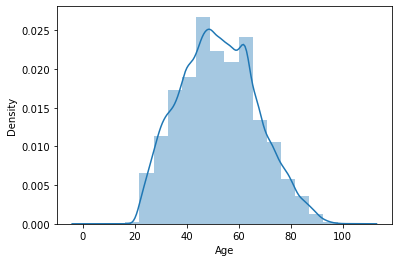

In [89]:
#mean is almost same as median in almost all variables so the date is  not skewed
#although SD is not that high but there is a huge gap between 75percentile and max value hence there are some outliers
#but no of outliers will be small
sns.distplot(cr["Age"],bins=20)


<AxesSubplot:xlabel='ActiveLoans', ylabel='Density'>

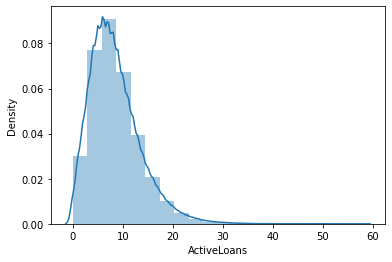

In [90]:
sns.distplot(cr["ActiveLoans"],bins=20)

<AxesSubplot:xlabel='Due90Days', ylabel='Density'>

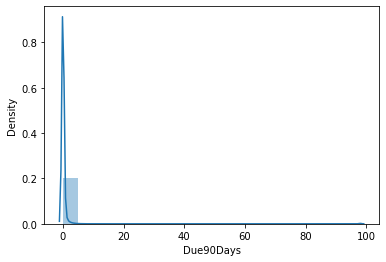

In [91]:
sns.distplot(cr["Due90Days"],bins=20)

<AxesSubplot:xlabel='RealEstateLoans', ylabel='Density'>

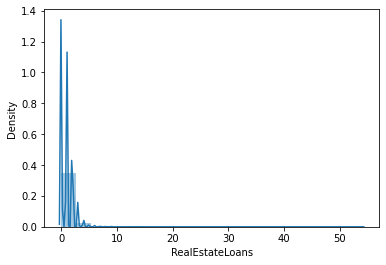

In [92]:
sns.distplot(cr["RealEstateLoans"],bins=20)

<AxesSubplot:>

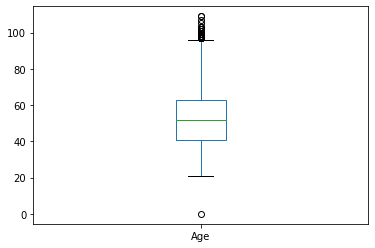

In [93]:
#checking outliers through box plot
cr["Age"].plot.box()

<AxesSubplot:>

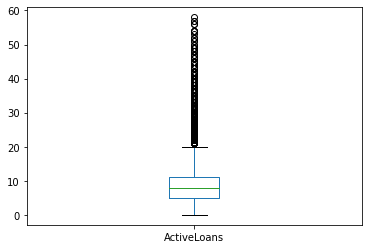

In [94]:
cr["ActiveLoans"].plot.box()

<AxesSubplot:>

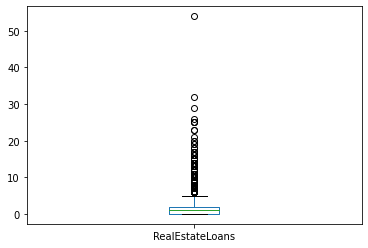

In [95]:
cr["RealEstateLoans"].plot.box()

In [96]:
#There are only few outliers in the dateset, here max age is showing 109 that is quite illogical
#so outliers should be removed on the basis of age by max min thereshold

In [97]:
minthershold,maxthershold=cr.Age.quantile([0.001,0.999])
minthershold,maxthershold

(21.0, 94.0)

In [98]:
cr[cr.Age<minthershold]

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
65695,0,6,0,2,0.0,0


In [99]:
cr[cr.Age>maxthershold]

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization,Default
436,97,2,0,0,-4.961845,0
2864,96,3,0,0,-4.474142,0
2922,99,5,0,0,-5.298317,0
4627,95,3,0,1,0.000000,0
6833,95,3,0,0,-4.677741,0
...,...,...,...,...,...,...
143221,96,2,0,1,-2.821779,0
144319,95,7,0,0,-3.839702,0
146042,95,2,0,0,-4.595220,0
147651,97,8,0,1,-4.491842,0


In [100]:
CR=cr[(cr.Age<maxthershold)&(cr.Age>minthershold)]

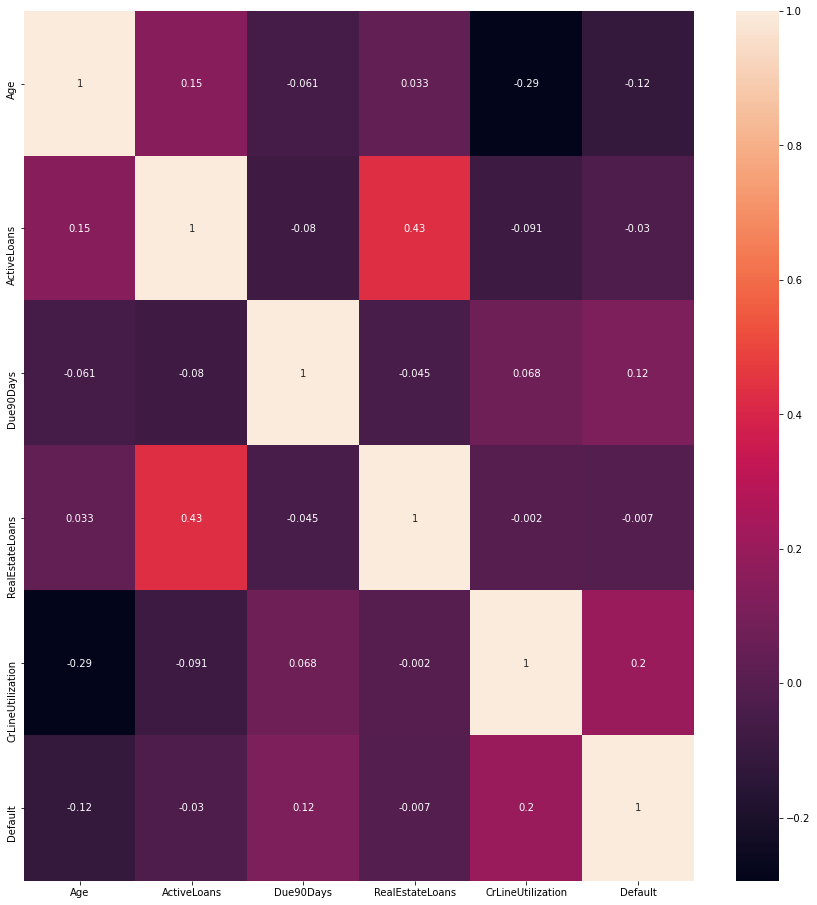

In [101]:
corr_hmap=cr.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [102]:
x = cr.drop('Default', axis=1).copy()

In [103]:
# no multicollinearity found, checking multicollinearity by variance inflation factor
#Here except crlineutilization and duein90days every other factors are negatively correlated
#But active loans and real estate loans must be postively correlated with default, lets validate with logistic regression

In [104]:
x

,Age,ActiveLoans,Due90Days,RealEstateLoans,CrLineUtilization
0,45,13,0,6,-0.266443
1,40,4,0,0,-0.043743
2,38,2,1,0,-0.418246
3,30,5,0,0,-1.453289
4,49,7,0,1,-0.097392
...,...,...,...,...,...
149995,74,4,0,1,-3.201527
149996,44,4,0,1,-1.204973
149997,58,18,0,1,-1.402424
149998,30,4,0,0,-1.969432


In [105]:
y = cr['Default'].copy()
y

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: Default, Length: 150000, dtype: int64

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [107]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [108]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [110]:
x_train.shape

(120000, 5)

In [111]:
y_train.shape

(120000,)

In [112]:
x_test.shape

(30000, 5)

In [113]:
y_test.shape

(30000,)

In [114]:
lg=LogisticRegression()

In [115]:
lg.fit(x_train,y_train)

LogisticRegression()

In [116]:
lg.coef_

array([[-0.01995573,  0.01648651,  0.02787012,  0.0194503 ,  0.63183803]])

In [117]:
lg.intercept_

array([-0.98902685])

In [118]:
pred=lg.predict(x_test)

In [119]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
accuracy_score(y_test,pred)
#accuracy is the no of correct predictions/total no of predictions

0.9331

In [121]:
print(confusion_matrix(y_test,pred))
#it shows type 1 and type 2 error

[[27964    80]
 [ 1927    29]]


In [122]:
print(classification_report(y_test,pred))
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision), shows what % of positive predictions are correct
#precision says hat % of predictions are correct
#Precision = TP/(TP + FP), it is accuracy of positive predictions
#Recall is the fraction of positive that are correctly identified
#Recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.27      0.01      0.03      1956

    accuracy                           0.93     30000
   macro avg       0.60      0.51      0.50     30000
weighted avg       0.89      0.93      0.90     30000



<AxesSubplot:>

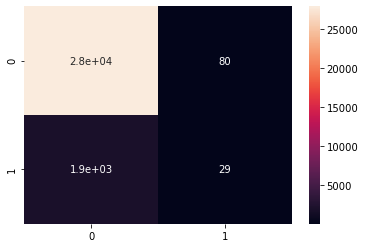

In [123]:
p=confusion_matrix(y_test,pred)
sns.heatmap(p,annot=True)

In [124]:
lg.coef_

array([[-0.01995573,  0.01648651,  0.02787012,  0.0194503 ,  0.63183803]])

In [125]:
lg.intercept_

array([-0.98902685])

In [126]:
lg.score(x_train,y_train)

0.9316666666666666

In [127]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [128]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [129]:
y_pred_prob

array([0.01457774, 0.0390516 , 0.01985942, ..., 0.16250524, 0.00892753,
       0.02889612])

In [130]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [131]:
fpr
#FPR=FP/FP+TN

array([0.00000000e+00, 3.56582513e-05, 1.42633005e-04, ...,
       9.96541150e-01, 9.96541150e-01, 1.00000000e+00])

In [132]:
tpr
#TPR=TP/TP+FN, FN is False negative and TP is true Positive

array([0.        , 0.        , 0.        , ..., 0.99948875, 1.        ,
       1.        ])

In [133]:
thersholds

array([1.99120364e+00, 9.91203641e-01, 9.85890319e-01, ...,
       8.01390663e-04, 7.99564178e-04, 2.07811194e-04])

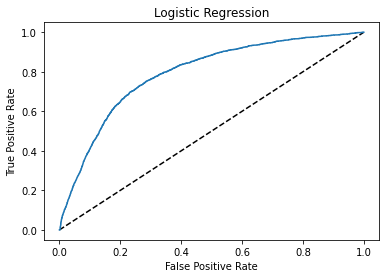

In [134]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [135]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [136]:
auc_score

0.505986757881786

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
st=StandardScaler()
x=st.fit_transform(x)
x
#Standard scalling is done to make the datapoints generalised so the distance between them is lower

array([[-4.93859818e-01,  8.83656911e-01, -6.37934373e-02,
         4.40954554e+00,  9.98464430e-01],
       [-8.32342222e-01, -8.65296784e-01, -6.37934373e-02,
        -9.01283010e-01,  1.12903343e+00],
       [-9.67735183e-01, -1.25395316e+00,  1.76055560e-01,
        -9.01283010e-01,  9.09461682e-01],
       ...,
       [ 3.86194432e-01,  1.85529785e+00, -6.37934373e-02,
        -1.61449188e-02,  3.32437638e-01],
       [-1.50930703e+00, -8.65296784e-01, -6.37934373e-02,
        -9.01283010e-01, -4.30306835e-11],
       [ 7.92373317e-01, -8.79840306e-02, -6.37934373e-02,
         8.68993173e-01,  1.05960185e+00]])

In [139]:
X=pd.DataFrame(data=x)
X

,0,1,2,3,4
0,-0.493860,0.883657,-0.063793,4.409546,9.984644e-01
1,-0.832342,-0.865297,-0.063793,-0.901283,1.129033e+00
2,-0.967735,-1.253953,0.176056,-0.901283,9.094617e-01
3,-1.509307,-0.670969,-0.063793,-0.901283,3.026152e-01
4,-0.223074,-0.282312,-0.063793,-0.016145,1.097579e+00
...,...,...,...,...,...
149995,1.469338,-0.865297,-0.063793,-0.016145,-7.223783e-01
149996,-0.561556,-0.865297,-0.063793,-0.016145,4.482030e-01
149997,0.386194,1.855298,-0.063793,-0.016145,3.324376e-01
149998,-1.509307,-0.865297,-0.063793,-0.901283,-4.303068e-11


In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [141]:
lg=LogisticRegression()

In [142]:
lg.fit(x_train,y_train)

LogisticRegression()

In [143]:
lg.score(x_train,y_train)

0.9316666666666666

In [144]:
y_pred_prob=lg.predict_proba(X_test)[:,1]

In [145]:
auc_score=roc_auc_score(y_test,lg.predict(X_test))

In [146]:
auc_score

0.5071460885742213

In [147]:
lg.coef_

array([[-0.01995573,  0.01648651,  0.02787012,  0.0194503 ,  0.63183803]])

In [148]:
lg.intercept_

array([-0.98902685])

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0.41284404, 0.22413793, 0.        , 0.11111111, 0.44620923],
       [0.36697248, 0.06896552, 0.        , 0.        , 0.45731967],
       [0.34862385, 0.03448276, 0.01020408, 0.        , 0.43863576],
       ...,
       [0.53211009, 0.31034483, 0.        , 0.01851852, 0.38953536],
       [0.27522936, 0.06896552, 0.        , 0.        , 0.36124742],
       [0.58715596, 0.13793103, 0.        , 0.03703704, 0.45141156]])

In [151]:
xx=pd.DataFrame(data=x)
xx

,0,1,2,3,4
0,0.412844,0.224138,0.000000,0.111111,0.446209
1,0.366972,0.068966,0.000000,0.000000,0.457320
2,0.348624,0.034483,0.010204,0.000000,0.438636
3,0.275229,0.086207,0.000000,0.000000,0.386998
4,0.449541,0.120690,0.000000,0.018519,0.454643
...,...,...,...,...,...
149995,0.678899,0.068966,0.000000,0.018519,0.299778
149996,0.403670,0.068966,0.000000,0.018519,0.399386
149997,0.532110,0.310345,0.000000,0.018519,0.389535
149998,0.275229,0.068966,0.000000,0.000000,0.361247


In [152]:
xx_train,xx_test,y_train,y_test=train_test_split(xx,y,test_size=0.20,random_state=42)

In [153]:
lg=LogisticRegression()

In [154]:
lg.fit(xx_train,y_train)

LogisticRegression()

In [155]:
lg.score(xx_train,y_train)

0.93165

In [156]:
y_pred_prob=lg.predict_proba(xx_test)[:,1]

In [157]:
auc_score=roc_auc_score(y_test,lg.predict(X_test))

In [158]:
auc_score

0.7306853690913402

In [159]:
lg.coef_

array([[-2.19075661,  0.9058052 ,  2.68559597,  0.76637072, 12.05739018]])

In [161]:
lg.intercept_

array([-6.53770561])

In [ ]:
#Minmax scalling model is giving best result As accuracy score is 0.93 and auc score is 0.73, so business
#firm should use this model to predict the defaulter
# Due90days and crutilization are the most important factors because these are highly positive coefficient compared 
#to other factors hence it these increases then chance of being defaulter also increases
#Activeloans and realestate loans are also have positive coeficient hence if these increases chance of being defaulter
#increases
#Age is negatvely coorelated hence aged person are most likely to become non defaulter  because they have savings as well as 
#high income